# Initialize


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the csv file1
df = pd.read_csv("/content/drive/MyDrive/ML/HW4/data1.csv", index_col=None)
# Reading the csv file2
df2 = pd.read_csv("/content/drive/MyDrive/ML/HW4/data2.csv", index_col=None)

# DBSCAN Algorithm

In [ ]:
# Find the distance of each points (Euclidean distance)
def distance(df, i, j):
    xs = (df.iloc[i, 0] - df.iloc[j, 0]) ** 2
    ys = (df.iloc[i, 1] - df.iloc[j, 1]) ** 2
    return np.sqrt(xs + ys)

In [ ]:
# this is the main function for find clusters
def dbscan(df, eps, min_samples, m):
  # Initialize the visited list and numbers of cluster
  visited = [0] * m[0]
  number_of_cluster = 0
  for i in range(m[0]):
    # This point is already visited
    if visited[i] != 0:
      continue
    # Adding the neighbors of a selected point
    neighbors = []
    for j in range(m[0]):
        # If distance of the selected point and iterate point less than epsilon, add it to the neighbors
        if distance(df, i, j) <= eps:
           neighbors.append(j)
    # If number of neighbors less than min samples, mark the point as noise
    if len(neighbors) < min_samples:
            visited[i] = -1
    else:
            # If number of neighbors graeter than min samples, mark the point as a new group of cluster
            number_of_cluster += 1
            visited[i] = number_of_cluster
            j = 0
            while j < len(neighbors):
               # If the point is already marked as noise, change it's status to the selected cluster
               if visited[neighbors[j]] == -1:
                  visited[neighbors[j]] = number_of_cluster
              # If the point is not visited yet, add the point to the cluster and after that find the selected points neighbors
               elif visited[neighbors[j]] == 0:
                    visited[neighbors[j]] = number_of_cluster
                    new_neighbors = []
                    for k in range(len(df)):
                        if distance(df,neighbors[j], k) < eps:
                            new_neighbors.append(k)
                    if len(new_neighbors) >= min_samples:
                        neighbors.extend(new_neighbors)
               j += 1
            # expand_cluster(df, visited, neighbors, number_of_cluster, eps, min_samples)
  return visited

# Dataset one

In [ ]:
df.head()

,Unnamed: 0,x,y
0,0,0.438595,0.215316
1,1,-0.422453,-0.305440
2,2,-1.012481,0.047559
3,3,0.976358,0.038049
4,4,-1.016175,-0.277860


In [ ]:
# Drop the unnamed column
df = df.drop(df.columns[0], axis=1)

In [ ]:
df.head()

,x,y
0,0.438595,0.215316
1,-0.422453,-0.305440
2,-1.012481,0.047559
3,0.976358,0.038049
4,-1.016175,-0.277860


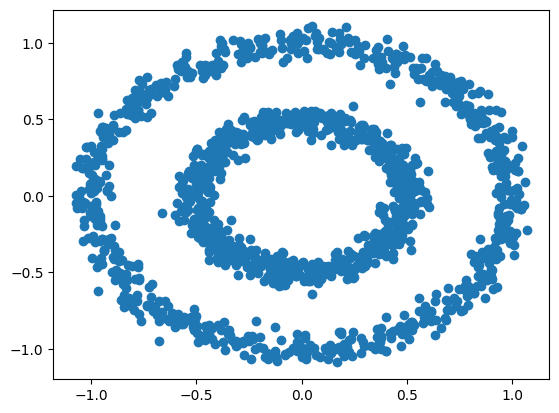

In [ ]:
# print the scatter plot
plt.scatter(df['x'], df['y'])
plt.show()

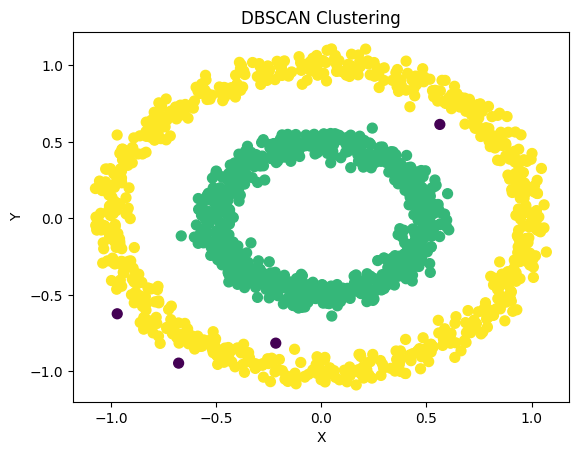

In [ ]:
# Initialize the hyperparameters
eps=0.1
min_samples=5
m = df.shape
r = dbscan(df, eps, min_samples, m)

# Ploting dataframe after clustering
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=r, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Dataset two

In [ ]:
df2.head()

,x,y
0,0.064928,0.149214
1,1.294972,-0.457130
2,0.034000,0.937492
3,0.976778,0.021321
4,-0.200670,0.992690


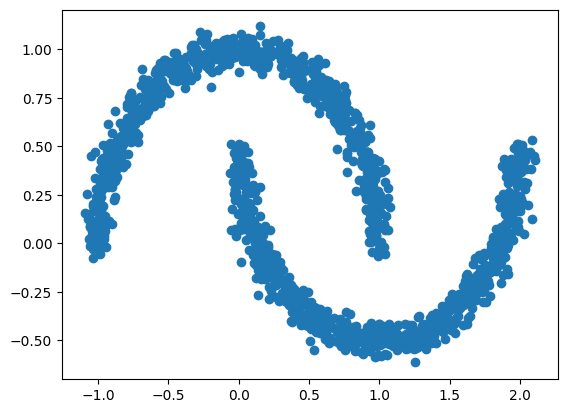

In [ ]:
# print the scatter plot
plt.scatter(df2['x'], df2['y'])
plt.show()

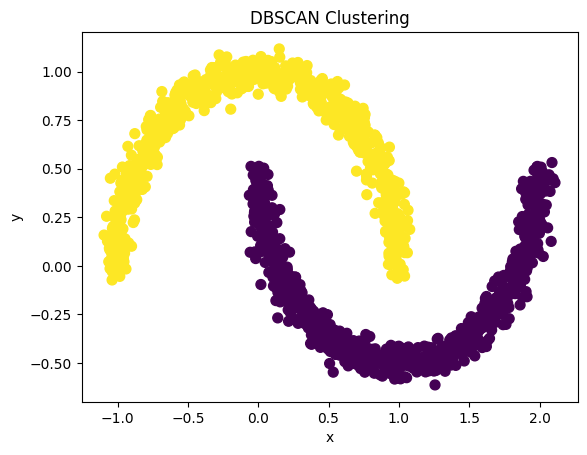

In [ ]:
# Initialize the hyperparameters
eps=0.1
min_samples=5
m = df.shape
r2 = dbscan(df2, eps, min_samples, m)

plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], c=r2, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.show()